### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [121]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 15:10:02


In [122]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [123]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [124]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [125]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [126]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [127]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 15:10:02


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [128]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [129]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [130]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [131]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [132]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [133]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the first method

## Word2Vec
in word2vec we have two methods:
- cbow architecture (target is predicted by context)
- skipgram (target predicts context)

In [134]:
# for sg variable
sg = 0 # CBOW
# sg = 1 # Skip-Gram

if sg == 0:
    model_type = 'CBOW'
else:
    model_type = 'Skipgram'

print(f"sg={sg}, model={model_type}")

sg=0, model=CBOW


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [135]:
vector_sizes = [50, 100, 150, 200, 250, 300]
selected_vector_size = 200

In [136]:
windows = [3, 5, 7, 10, 12, 15, 20]
selected_window = windows[0]

In [137]:
epochs = [50, 100, 150, 200, 250]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [138]:
def get_avg_word2vec(tokens, model, vector_size=300):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size) 

In [139]:
def run_word2vec (docs, vector_size, window_size, epoch):
    word2vec_model = Word2Vec(
        sentences=docs,                        # Tokenized text
        vector_size=vector_size,           # Each word is represented by a x-dimensional vector
        window=window_size,                     # Context window size
        min_count=1,                                # Ignores words that appear less than 'min_count' times
        workers=4,                                  # Number of CPU cores used
        sg=sg,                   
        epochs=epoch                       # Number of training iterations
    )
    # print(word2vec_model)
    
    # Convert the list to a Pandas Series
    documents_series = pd.Series(docs)

    docs = documents_series.apply(lambda x: get_avg_word2vec(x, word2vec_model))    
    docs = np.array(docs.tolist())
    
    # print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [140]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [141]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Word2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [142]:
copy_of_docs = documents

In [143]:
# window = selected_window
epoch = selected_epoch
vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [144]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [145]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [146]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [147]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for window in windows:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_word2vec(copy_of_docs, vector_size, window, epoch)
        print(f"sg={sg}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished displaying at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.1 range
            sil_diff = sil - best_Sil
            wss_diff = best_WSS - wss
            if sil_diff > 0 and sil_diff < 0.1 and wss_diff > 0:
                best_combination = [k, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

2025-03-09 15:10:05,836 : INFO : collecting all words and their counts
2025-03-09 15:10:05,839 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:05,842 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:05,853 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:05,856 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:05,860 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:05.860158', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:05,863 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:10:05 



2025-03-09 15:10:06,038 : INFO : EPOCH 4: training on 24723 raw words (4691 effective words) took 0.0s, 336770 effective words/s
2025-03-09 15:10:06,066 : INFO : EPOCH 5: training on 24723 raw words (4668 effective words) took 0.0s, 273493 effective words/s
2025-03-09 15:10:06,090 : INFO : EPOCH 6: training on 24723 raw words (4722 effective words) took 0.0s, 389691 effective words/s
2025-03-09 15:10:06,113 : INFO : EPOCH 7: training on 24723 raw words (4782 effective words) took 0.0s, 352442 effective words/s
2025-03-09 15:10:06,134 : INFO : EPOCH 8: training on 24723 raw words (4738 effective words) took 0.0s, 733289 effective words/s
2025-03-09 15:10:06,157 : INFO : EPOCH 9: training on 24723 raw words (4729 effective words) took 0.0s, 391915 effective words/s
2025-03-09 15:10:06,173 : INFO : EPOCH 10: training on 24723 raw words (4650 effective words) took 0.0s, 1022855 effective words/s
2025-03-09 15:10:06,191 : INFO : EPOCH 11: training on 24723 raw words (4604 effective words) t

sg=0, Vector_Size=200, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:10:07 

Executing 5 start time: 2025-03-09 15:10:07
K=5: Silhouette Score and WSS=0.2035	4.4342

Cluster 0:
- Emirati ambassador to Washington says ‘no alternative’ to Trump's Gaza plan
- HBL, S&P Global launch Pakistan’s first manufacturing PMI
- Bureaucrats will also have to declare their assets
- Ahmed Ali Akbar and Maham Batool Kickstart Their Wedding with a Qawwali Night
- Pakistan, Turkiye sign multiple agreements to boost bilateral relations

Cluster 1:
- More than 500 million take ‘holy dip’ in India’s Maha Kumbh festival
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- ICC announces prize money for 2025 Champions Trophy
- PFC makes significant impact at 11th IDF
- AsiaPak, Montage Oil bid for 75% of Lotte Chemical

Cluster 2:
- Remembering Faiz: A Bengali kid’s first lessons in poetry & politics
- Senate body vows to continue probing solar panel import scandal
- Sh

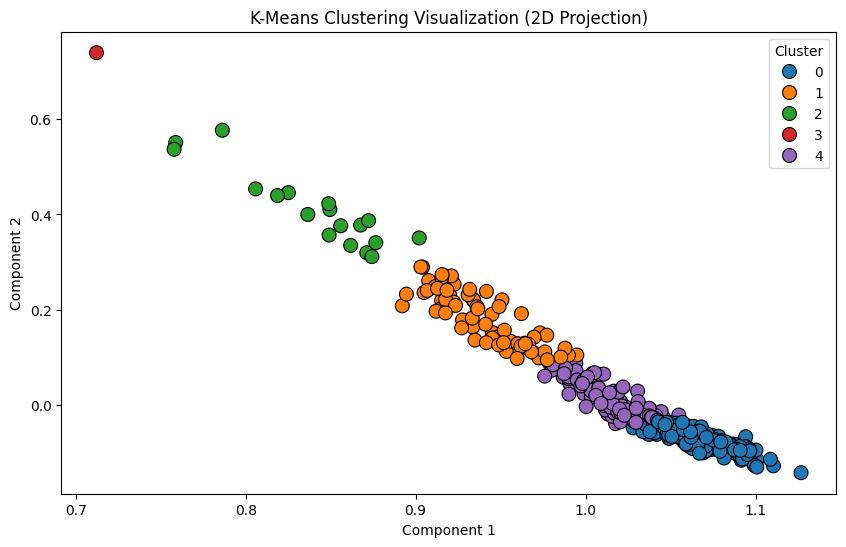

2025-03-09 15:10:07,395 : INFO : collecting all words and their counts
2025-03-09 15:10:07,397 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:07,399 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:07,405 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:07,406 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:07,408 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:07.408728', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:07,410 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:07 

Finished executing at: 2025-03-09 15:10:07 

Executed at: 2025-03-09 15:10:07 



2025-03-09 15:10:07,606 : INFO : EPOCH 8: training on 24723 raw words (4690 effective words) took 0.0s, 503949 effective words/s
2025-03-09 15:10:07,626 : INFO : EPOCH 9: training on 24723 raw words (4614 effective words) took 0.0s, 557799 effective words/s
2025-03-09 15:10:07,649 : INFO : EPOCH 10: training on 24723 raw words (4681 effective words) took 0.0s, 330029 effective words/s
2025-03-09 15:10:07,666 : INFO : EPOCH 11: training on 24723 raw words (4763 effective words) took 0.0s, 654555 effective words/s
2025-03-09 15:10:07,683 : INFO : EPOCH 12: training on 24723 raw words (4670 effective words) took 0.0s, 537659 effective words/s
2025-03-09 15:10:07,701 : INFO : EPOCH 13: training on 24723 raw words (4771 effective words) took 0.0s, 602027 effective words/s
2025-03-09 15:10:07,720 : INFO : EPOCH 14: training on 24723 raw words (4688 effective words) took 0.0s, 410246 effective words/s
2025-03-09 15:10:07,737 : INFO : EPOCH 15: training on 24723 raw words (4758 effective words

sg=0, Vector_Size=200, Window=5, Epoch=50
Finished displaying at: 2025-03-09 15:10:08 

Executing 5 start time: 2025-03-09 15:10:08
K=5: Silhouette Score and WSS=0.1963	5.3572

Cluster 0:
- Credits against tax WH: FBR issuing notices to salaried individuals: KTBA
- From Aztec Ritual to Valentine’s Day Staple: The Rise of Chocolate Gifts
- Turkiye President Erdogan touches down in Pakistan
- Israel says Hamas must free three living hostages
- Deepika Padukone talks exam stress, mental health

Cluster 1:
- Star Grammar School among 69 buildings sealed in Lahore
- Islamabad’s Zones 2, 4, and 5: CDA forms joint body to oversee projects
- Over 500 million devotees take 'holy dip' at Maha Kumbh Mela in India
- Druski roasted by NBA fans for bold 2025 All-Star game stat predictions and lack of defense
- Security forces kill 13 terrorists in KP operations

Cluster 2:
- PM vows to advance objective of combating climate change
- Pakistan Petroleum Limited secures 10-year lease extension for Sui 

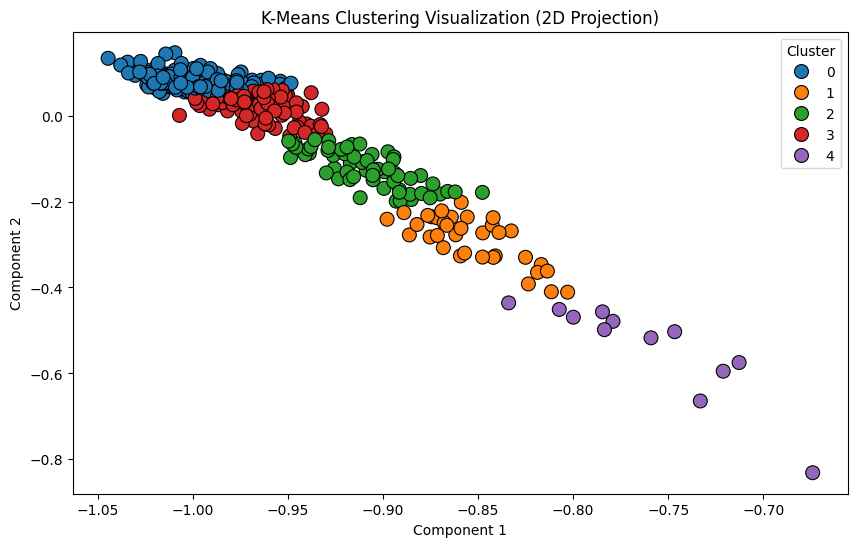

2025-03-09 15:10:08,779 : INFO : collecting all words and their counts
2025-03-09 15:10:08,780 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:08,781 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:08,788 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:08,790 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:08,792 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:08.792273', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:08,793 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:08 

Finished executing at: 2025-03-09 15:10:08 

Executed at: 2025-03-09 15:10:08 



2025-03-09 15:10:08,961 : INFO : EPOCH 7: training on 24723 raw words (4634 effective words) took 0.0s, 642059 effective words/s
2025-03-09 15:10:08,984 : INFO : EPOCH 8: training on 24723 raw words (4677 effective words) took 0.0s, 444535 effective words/s
2025-03-09 15:10:09,035 : INFO : EPOCH 9: training on 24723 raw words (4595 effective words) took 0.0s, 252040 effective words/s
2025-03-09 15:10:09,141 : INFO : EPOCH 10: training on 24723 raw words (4604 effective words) took 0.0s, 157915 effective words/s
2025-03-09 15:10:09,170 : INFO : EPOCH 11: training on 24723 raw words (4675 effective words) took 0.0s, 314601 effective words/s
2025-03-09 15:10:09,215 : INFO : EPOCH 12: training on 24723 raw words (4739 effective words) took 0.0s, 164585 effective words/s
2025-03-09 15:10:09,242 : INFO : EPOCH 13: training on 24723 raw words (4639 effective words) took 0.0s, 401562 effective words/s
2025-03-09 15:10:09,267 : INFO : EPOCH 14: training on 24723 raw words (4676 effective words)

sg=0, Vector_Size=200, Window=7, Epoch=50
Finished displaying at: 2025-03-09 15:10:10 

Executing 5 start time: 2025-03-09 15:10:10
K=5: Silhouette Score and WSS=0.1928	5.3223

Cluster 0:
- UEFA Champions League playoffs: Bayern, Benfica in ideal position
- HBL, S&P Global launch Pakistan’s first manufacturing PMI
- Sabalenka, Gauff dumped out of Qatar Open
- Aurat March kickstarts in February this year
- Babar Azam breaks Virat Kohli's another record

Cluster 1:
- More than 500 million take ‘holy dip’ in India’s Maha Kumbh festival
- UAE is offering 10-Year Visa; Guide for Pakistanis to apply in 2025
- Trail Blazers vs Nuggets 121-132: Jamal Murray has career night for Denver
- ICC announces prize money for 2025 Champions Trophy
- Govt hikes RLNG prices by up to 1.86pc

Cluster 2:
- Pakistan Refinery says will shut down plant for ‘approximately 6 days’
- Wasim Akram joins Meer Group to drive Global Impact Vision 2030
- Railways to restore Shah Hussain Express from 25th
- Key banks imp

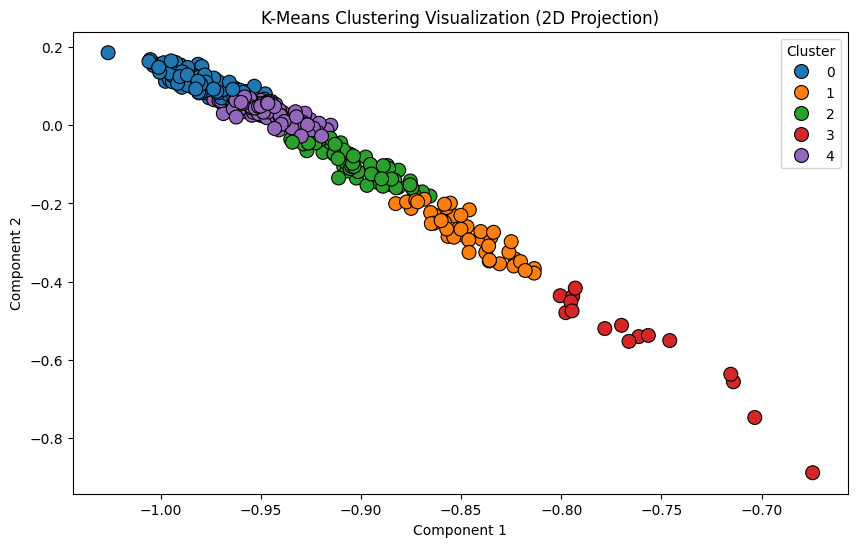

2025-03-09 15:10:10,703 : INFO : collecting all words and their counts
2025-03-09 15:10:10,705 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:10,708 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:10,718 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:10,719 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:10,720 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:10.720322', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:10,722 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:10 

Finished executing at: 2025-03-09 15:10:10 

Executed at: 2025-03-09 15:10:10 



2025-03-09 15:10:10,911 : INFO : EPOCH 8: training on 24723 raw words (4657 effective words) took 0.0s, 393381 effective words/s
2025-03-09 15:10:10,931 : INFO : EPOCH 9: training on 24723 raw words (4701 effective words) took 0.0s, 409463 effective words/s
2025-03-09 15:10:10,952 : INFO : EPOCH 10: training on 24723 raw words (4700 effective words) took 0.0s, 430959 effective words/s
2025-03-09 15:10:10,971 : INFO : EPOCH 11: training on 24723 raw words (4675 effective words) took 0.0s, 561791 effective words/s
2025-03-09 15:10:10,991 : INFO : EPOCH 12: training on 24723 raw words (4644 effective words) took 0.0s, 342794 effective words/s
2025-03-09 15:10:11,011 : INFO : EPOCH 13: training on 24723 raw words (4636 effective words) took 0.0s, 369267 effective words/s
2025-03-09 15:10:11,032 : INFO : EPOCH 14: training on 24723 raw words (4709 effective words) took 0.0s, 430596 effective words/s
2025-03-09 15:10:11,047 : INFO : EPOCH 15: training on 24723 raw words (4637 effective words

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:10:12 

Executing 5 start time: 2025-03-09 15:10:12
K=5: Silhouette Score and WSS=0.2609	4.3962

Cluster 0:
- Sabrina Carpenter's 'Bad Reviews' lyrics spark rumors about Barry Keoghan after clues in album
- PlayStation state of play returns with new games, trailers, and updates
- UK, US agree Zelenskiy must be part of Ukraine peace talks, UK foreign minister says
- Atif Aslam’s breakup advice gains attention and debate
- US awaits Arab plan for Gaza, Trump plan remains default option: Washington

Cluster 1:
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- Excellence Over Perfection: Highlights from the ADA Awards 2025
- Govt hikes RLNG prices by up to 1.86pc
- Pakistan CPI 2024 – deep-rooted corruption persists
- ICC announces prize money for 2025 Champions Trophy

Cluster 2:
- Star Grammar School among 69 buildings sealed in Lahore
- 9 Nail Polish Shades to Fall in Love With Th

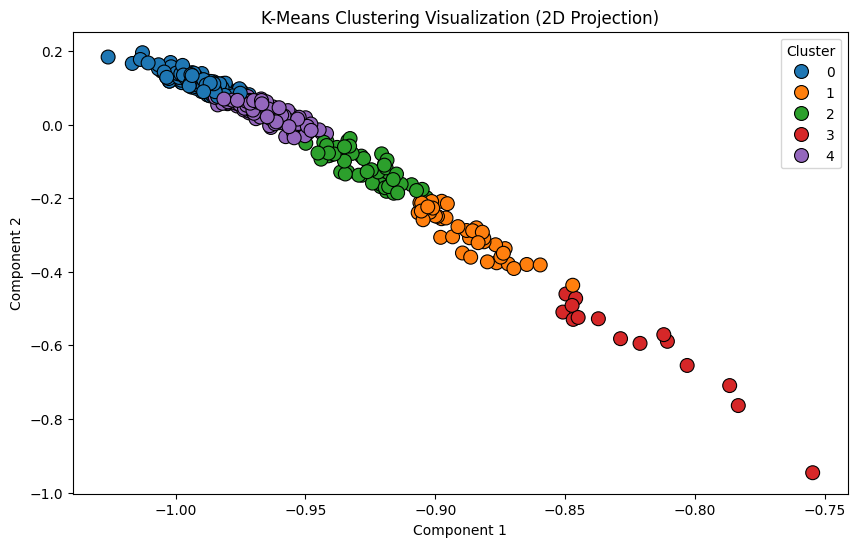

2025-03-09 15:10:12,844 : INFO : collecting all words and their counts
2025-03-09 15:10:12,845 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:12,847 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:12,853 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:12,854 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:12,856 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:12.856867', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:12,858 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:12 

Finished executing at: 2025-03-09 15:10:12 

Executed at: 2025-03-09 15:10:12 



2025-03-09 15:10:13,033 : INFO : EPOCH 3: training on 24723 raw words (4676 effective words) took 0.0s, 275701 effective words/s
2025-03-09 15:10:13,060 : INFO : EPOCH 4: training on 24723 raw words (4721 effective words) took 0.0s, 306020 effective words/s
2025-03-09 15:10:13,092 : INFO : EPOCH 5: training on 24723 raw words (4588 effective words) took 0.0s, 220192 effective words/s
2025-03-09 15:10:13,124 : INFO : EPOCH 6: training on 24723 raw words (4657 effective words) took 0.0s, 268229 effective words/s
2025-03-09 15:10:13,148 : INFO : EPOCH 7: training on 24723 raw words (4626 effective words) took 0.0s, 307844 effective words/s
2025-03-09 15:10:13,177 : INFO : EPOCH 8: training on 24723 raw words (4735 effective words) took 0.0s, 282200 effective words/s
2025-03-09 15:10:13,206 : INFO : EPOCH 9: training on 24723 raw words (4603 effective words) took 0.0s, 218670 effective words/s
2025-03-09 15:10:13,238 : INFO : EPOCH 10: training on 24723 raw words (4680 effective words) too

sg=0, Vector_Size=200, Window=12, Epoch=50
Finished displaying at: 2025-03-09 15:10:14 

Executing 5 start time: 2025-03-09 15:10:14
K=5: Silhouette Score and WSS=0.2122	5.4490

Cluster 0:
- Naqvi inaugurates passport office at NADRA Mega Centre in Karachi’s Nazimabad
- Senate pays rich tributes to Prince Karim Aga Khan
- 'Qubool Hai:' Kubra Khan and Gohar Rasheed Have Tied the Knot in Makkah
- Basketball star Jahki Howard caught sliding into DMs of trans influencer
- South Green book berth in Rangers Cup Basketball final

Cluster 1:
- Rs10bn defamation suit: LHC seeks more arguments on IK’s plea
- Passing-out parade of 35th FC course held in Warsak
- Artists asked to submit their entries for exhibition till March 20
- Key banks implicated in Rs117bn over-invoicing scandal linked to solar panel imports
- MoITT sets up 43 software tech parks

Cluster 2:
- Deadline for third installment in Govt Hajj Scheme ends today
- ECC approves transfer of shares of DISCOs in President of Pakistan’s 

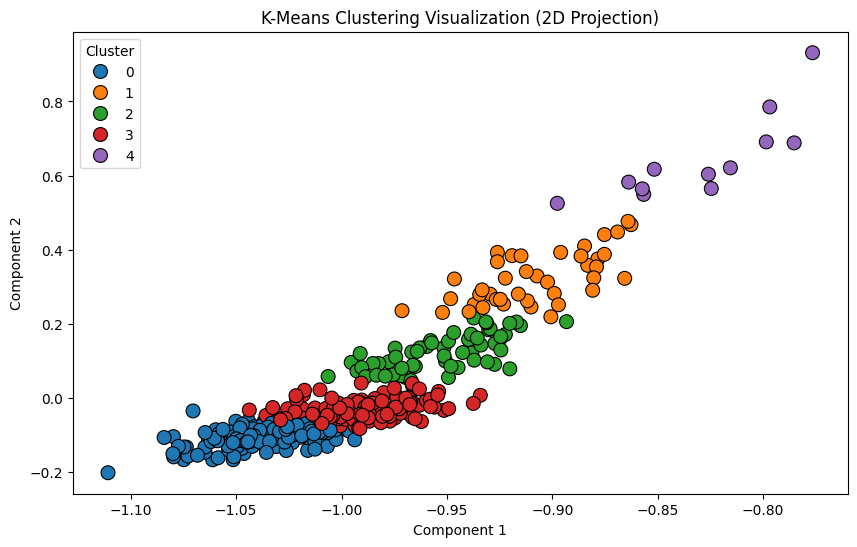

2025-03-09 15:10:14,916 : INFO : collecting all words and their counts
2025-03-09 15:10:14,917 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:14,918 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:14,927 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:14,928 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:14,930 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:14.930762', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:14,933 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:14 

Finished executing at: 2025-03-09 15:10:14 

Executed at: 2025-03-09 15:10:14 



2025-03-09 15:10:15,092 : INFO : EPOCH 5: training on 24723 raw words (4683 effective words) took 0.0s, 448421 effective words/s
2025-03-09 15:10:15,114 : INFO : EPOCH 6: training on 24723 raw words (4737 effective words) took 0.0s, 397887 effective words/s
2025-03-09 15:10:15,142 : INFO : EPOCH 7: training on 24723 raw words (4664 effective words) took 0.0s, 418890 effective words/s
2025-03-09 15:10:15,164 : INFO : EPOCH 8: training on 24723 raw words (4494 effective words) took 0.0s, 320400 effective words/s
2025-03-09 15:10:15,191 : INFO : EPOCH 9: training on 24723 raw words (4708 effective words) took 0.0s, 291027 effective words/s
2025-03-09 15:10:15,224 : INFO : EPOCH 10: training on 24723 raw words (4762 effective words) took 0.0s, 248074 effective words/s
2025-03-09 15:10:15,251 : INFO : EPOCH 11: training on 24723 raw words (4660 effective words) took 0.0s, 247403 effective words/s
2025-03-09 15:10:15,271 : INFO : EPOCH 12: training on 24723 raw words (4682 effective words) t

sg=0, Vector_Size=200, Window=15, Epoch=50
Finished displaying at: 2025-03-09 15:10:16 

Executing 5 start time: 2025-03-09 15:10:16
K=5: Silhouette Score and WSS=0.2196	4.9672

Cluster 0:
- South Green book berth in Rangers Cup Basketball final
- Bollywood music labels seek to challenge OpenAI in India copyright lawsuit
- Bureaucrats will also have to declare their assets
- Power of AI brings Urdu books to life
- Watch: Humpback whale swallows kayaker in dramatic Chilean waters encounter

Cluster 1:
- Rs10bn defamation suit: LHC seeks more arguments on IK’s plea
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- Key banks implicated in Rs117bn over-invoicing scandal linked to solar panel imports
- Pakistan set 243-run target for New Zealand in Tri-Nation series final
- Pakistan, Turkey forge historic partnership with 24 Landmark Deals

Cluster 2:
- Pakistan expresses strong concerns over US transfer of advanced technology to India
- New power projects: Govt r

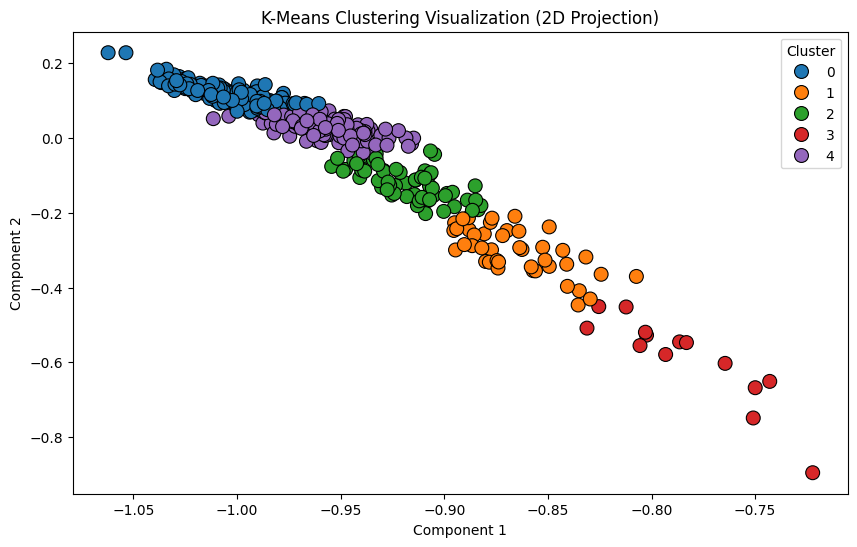

2025-03-09 15:10:16,541 : INFO : collecting all words and their counts
2025-03-09 15:10:16,542 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:16,543 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:16,552 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:16,554 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:16,556 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:16.556905', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:16,559 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:16 

Finished executing at: 2025-03-09 15:10:16 

Executed at: 2025-03-09 15:10:16 



2025-03-09 15:10:16,796 : INFO : EPOCH 0: training on 24723 raw words (4650 effective words) took 0.0s, 133517 effective words/s
2025-03-09 15:10:16,824 : INFO : EPOCH 1: training on 24723 raw words (4685 effective words) took 0.0s, 281130 effective words/s
2025-03-09 15:10:16,850 : INFO : EPOCH 2: training on 24723 raw words (4708 effective words) took 0.0s, 266004 effective words/s
2025-03-09 15:10:16,881 : INFO : EPOCH 3: training on 24723 raw words (4693 effective words) took 0.0s, 216857 effective words/s
2025-03-09 15:10:16,925 : INFO : EPOCH 4: training on 24723 raw words (4700 effective words) took 0.0s, 202272 effective words/s
2025-03-09 15:10:16,956 : INFO : EPOCH 5: training on 24723 raw words (4641 effective words) took 0.0s, 257276 effective words/s
2025-03-09 15:10:16,991 : INFO : EPOCH 6: training on 24723 raw words (4766 effective words) took 0.0s, 208493 effective words/s
2025-03-09 15:10:17,024 : INFO : EPOCH 7: training on 24723 raw words (4758 effective words) took

sg=0, Vector_Size=200, Window=20, Epoch=50
Finished displaying at: 2025-03-09 15:10:18 

Executing 5 start time: 2025-03-09 15:10:18
K=5: Silhouette Score and WSS=0.2549	5.2819

Cluster 0:
- Saudi Arabia to host Arab summit on Trump’s Gaza plan
- IGP pays tributes to police martyrs of Faisal Chowk Mall Road tragedy
- KU VC Prof Dr Khalid Iraqi inaugurates second agricultural festival
- HBL and S&P launch Pakistan’s first Purchasing Managers’ Index
- Aurat March kickstarts in February this year

Cluster 1:
- Israeli military killed 85 journalists in 2024: CPJ
- Champions Trophy 2025 Prize Money Breakdown in Pakistani rupee for 2025
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Lahore set to host 9th Faiz Festival 2025 from today
- Gold price soars by Rs2,500 per tola

Cluster 2:
- Police arrest three outlaws, recov stolen items
- New power projects: Govt removes FSA guarantee requirement
- CM inspects Gulberg integrated uplift pilot project
- Arsenal fan P

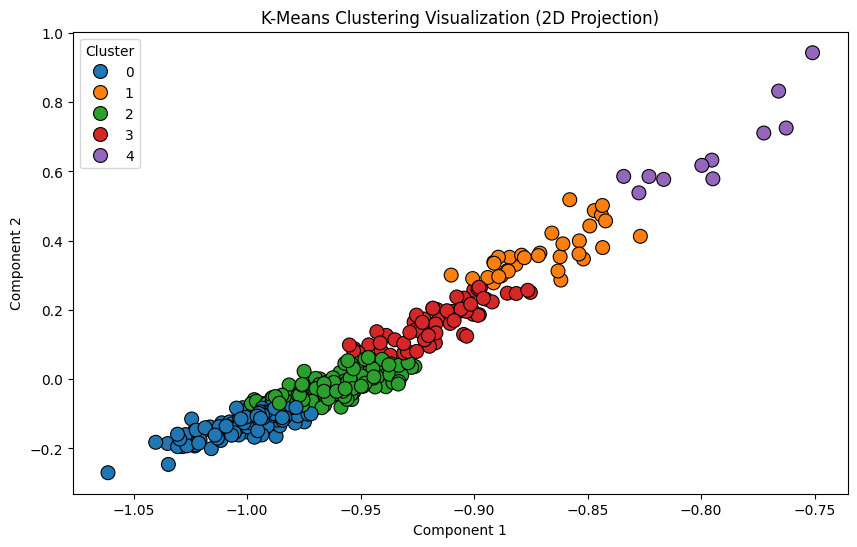

Finished displaying at: 2025-03-09 15:10:18 

Finished executing at: 2025-03-09 15:10:18 



In [148]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

2025-03-09 15:10:18,931 : INFO : collecting all words and their counts
2025-03-09 15:10:18,940 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:18,974 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:19,009 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:19,035 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:19,048 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:19.048654', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:19,050 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:10:18 



2025-03-09 15:10:19,107 : INFO : Word2Vec lifecycle event {'msg': 'downsampling leaves estimated 4679.028700545527 word corpus (18.9%% of prior 24723)', 'datetime': '2025-03-09T15:10:19.107661', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:19,150 : INFO : estimated required memory for 38 words and 200 dimensions: 79800 bytes
2025-03-09 15:10:19,152 : INFO : resetting layer weights
2025-03-09 15:10:19,157 : INFO : Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2025-03-09T15:10:19.157590', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'build_vocab'}
2025-03-09 15:10:19,166 : INFO : Word2Vec lifecycle event {'msg': 'training model with 4 workers on 38 vocabulary and 200 features, using sg=0 hs=0

sg=0, Vector_Size=200, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:10:20 

Executing 9 start time: 2025-03-09 15:10:20
K=9: Silhouette Score and WSS=0.1504	3.9402

Cluster 0:
- Everyone can’t go to jail to meet Imran: IHC CJ
- Ishaq Dar to visit USA for UNSC meeting
- Punjab law minister blames ‘complacent’ law officers for court summons to secretaries
- CJP Afridi administers oath to newly-appointed SC judges
- Man gets four-year term in narcotics case

Cluster 1:
- Artists asked to submit their entries for exhibition till March 20
- Page World Economy and Politics News ISB Page 5
- Petrol Price in Pakistan to ‘go down’ from Feb 16 amid dip in global oil rates
- Pope Francis, 88, admitted for bronchitis treatment after struggling to speak
- Man slays 4 kids before turning gun on himself

Cluster 2:
- UAE is offering 10-Year Visa; Guide for Pakistanis to apply in 2025
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Israeli military killed 85 journalists in 2

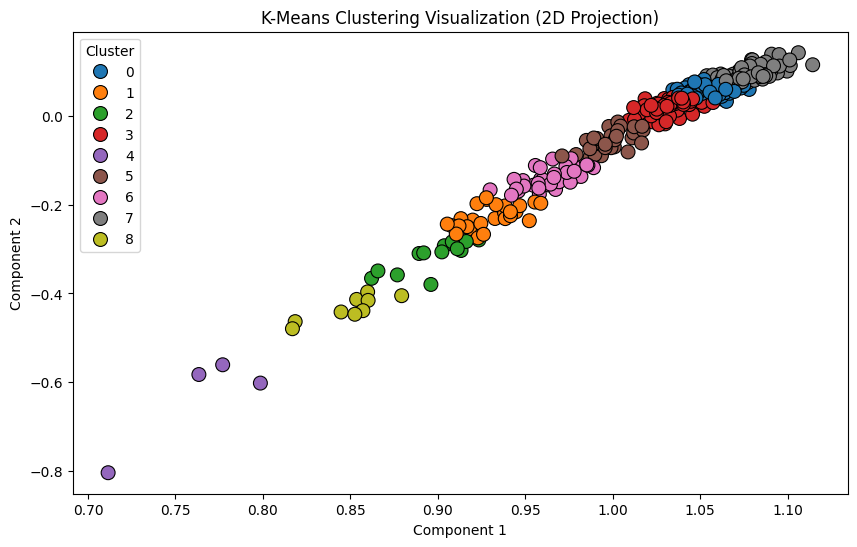

2025-03-09 15:10:21,381 : INFO : collecting all words and their counts
2025-03-09 15:10:21,382 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:21,383 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:21,390 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:21,391 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:21,393 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:21.393478', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:21,395 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:21 

Finished executing at: 2025-03-09 15:10:21 

Executed at: 2025-03-09 15:10:21 



2025-03-09 15:10:21,585 : INFO : EPOCH 6: training on 24723 raw words (4681 effective words) took 0.0s, 316192 effective words/s
2025-03-09 15:10:21,617 : INFO : EPOCH 7: training on 24723 raw words (4677 effective words) took 0.0s, 347994 effective words/s
2025-03-09 15:10:21,644 : INFO : EPOCH 8: training on 24723 raw words (4643 effective words) took 0.0s, 451799 effective words/s
2025-03-09 15:10:21,670 : INFO : EPOCH 9: training on 24723 raw words (4591 effective words) took 0.0s, 350471 effective words/s
2025-03-09 15:10:21,695 : INFO : EPOCH 10: training on 24723 raw words (4696 effective words) took 0.0s, 283913 effective words/s
2025-03-09 15:10:21,724 : INFO : EPOCH 11: training on 24723 raw words (4613 effective words) took 0.0s, 261788 effective words/s
2025-03-09 15:10:21,753 : INFO : EPOCH 12: training on 24723 raw words (4720 effective words) took 0.0s, 281341 effective words/s
2025-03-09 15:10:21,781 : INFO : EPOCH 13: training on 24723 raw words (4655 effective words) 

sg=0, Vector_Size=200, Window=5, Epoch=50
Finished displaying at: 2025-03-09 15:10:23 

Executing 9 start time: 2025-03-09 15:10:23
K=9: Silhouette Score and WSS=0.1760	3.2465

Cluster 0:
- Palestinian population 'must remain in its land’: Vatican
- #IStandWithSandiePeggie: Nurse Sandie Peggie speaks out amid NHS Fife women’s changing room scandal
- Gold prices see another rise to reach record highs in Pakistan
- ECC approves transfer of shares of DISCOs in President of Pakistan’s name
- Watch: Chaotic scenes at Liverpool vs Everton as fans invade the pitch

Cluster 1:
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- Pakistan Foreign Policy Challenges: Post US Presidential Election 2024
- PFC makes significant impact at 11th IDF
- Togg T10X, Turkey's first national electric SUV

Cluster 2:
- Gold rate in Pakistan today, 14 February, 2025
- Over 16,000 School Teacher Jobs 2025 – 

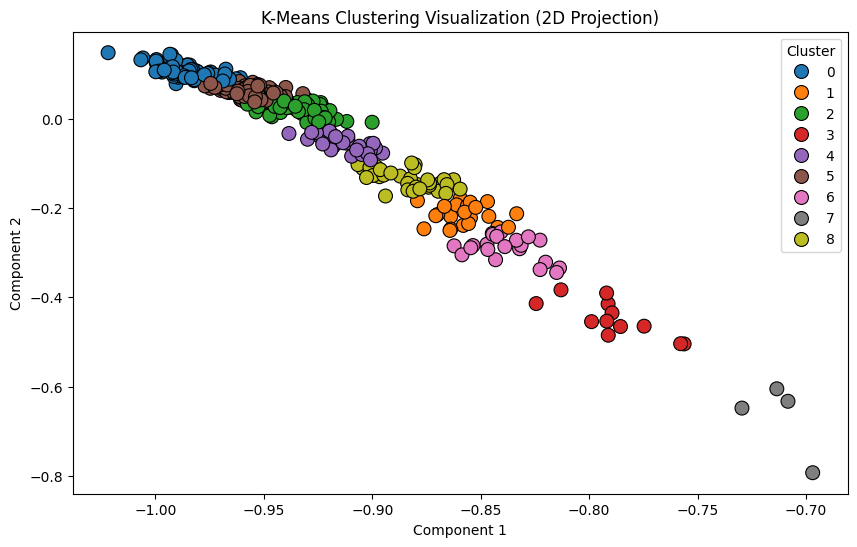

2025-03-09 15:10:23,658 : INFO : collecting all words and their counts
2025-03-09 15:10:23,659 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:23,661 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:23,669 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:23,671 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:23,673 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:23.673562', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:23,676 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:23 

Finished executing at: 2025-03-09 15:10:23 

Executed at: 2025-03-09 15:10:23 



2025-03-09 15:10:23,874 : INFO : EPOCH 8: training on 24723 raw words (4701 effective words) took 0.0s, 420288 effective words/s
2025-03-09 15:10:23,902 : INFO : EPOCH 9: training on 24723 raw words (4567 effective words) took 0.0s, 398166 effective words/s
2025-03-09 15:10:23,925 : INFO : EPOCH 10: training on 24723 raw words (4710 effective words) took 0.0s, 375000 effective words/s
2025-03-09 15:10:23,946 : INFO : EPOCH 11: training on 24723 raw words (4666 effective words) took 0.0s, 390294 effective words/s
2025-03-09 15:10:23,972 : INFO : EPOCH 12: training on 24723 raw words (4701 effective words) took 0.0s, 317702 effective words/s
2025-03-09 15:10:23,998 : INFO : EPOCH 13: training on 24723 raw words (4644 effective words) took 0.0s, 480333 effective words/s
2025-03-09 15:10:24,028 : INFO : EPOCH 14: training on 24723 raw words (4679 effective words) took 0.0s, 236623 effective words/s
2025-03-09 15:10:24,054 : INFO : EPOCH 15: training on 24723 raw words (4704 effective words

sg=0, Vector_Size=200, Window=7, Epoch=50
Finished displaying at: 2025-03-09 15:10:24 

Executing 9 start time: 2025-03-09 15:10:24
K=9: Silhouette Score and WSS=0.1796	3.7053

Cluster 0:
- Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan
- Bureaucrats will also have to declare their assets
- Palestinian population 'must remain in its land’: Vatican
- Pakistan prioritizes circular economy to boost sustainability, waste management: Romina
- Turkiye President Erdogan touches down in Pakistan

Cluster 1:
- Champions Trophy 2025: squads, groups and schedule
- KSE-100 closes 479 points lower as late-session selling erases intra-day gains
- IMF’s 2024 Article IV report, and debate on inflation—I
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- Pakistan CPI 2024 – deep-rooted corruption persists

Cluster 2:
- Elahi’s plea: AC reserves verdict till 27th
- Resident Alien season 4: new network, plot twists, and release timeline
- P

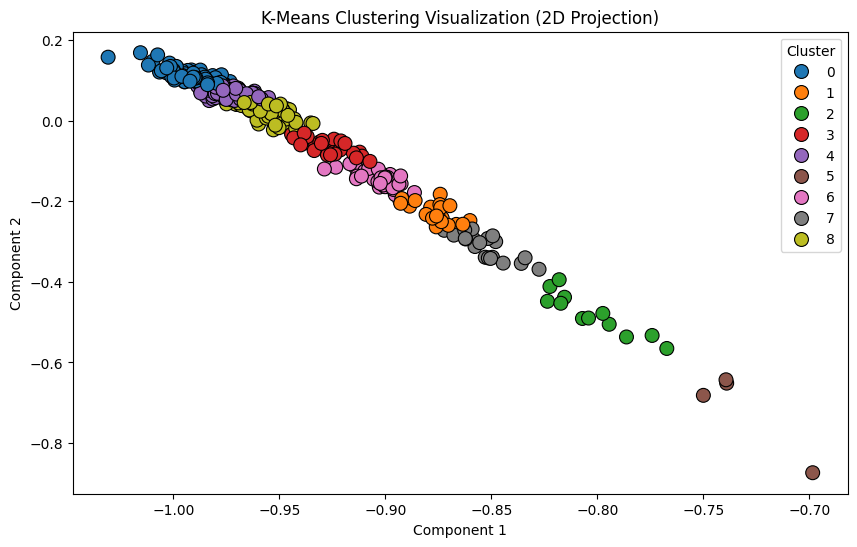

2025-03-09 15:10:25,311 : INFO : collecting all words and their counts
2025-03-09 15:10:25,313 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:25,313 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:25,317 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:25,320 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:25,322 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:25.322562', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:25,324 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:25 

Finished executing at: 2025-03-09 15:10:25 

Executed at: 2025-03-09 15:10:25 



2025-03-09 15:10:25,516 : INFO : EPOCH 9: training on 24723 raw words (4726 effective words) took 0.0s, 460350 effective words/s
2025-03-09 15:10:25,533 : INFO : EPOCH 10: training on 24723 raw words (4628 effective words) took 0.0s, 898048 effective words/s
2025-03-09 15:10:25,551 : INFO : EPOCH 11: training on 24723 raw words (4666 effective words) took 0.0s, 411892 effective words/s
2025-03-09 15:10:25,570 : INFO : EPOCH 12: training on 24723 raw words (4710 effective words) took 0.0s, 411919 effective words/s
2025-03-09 15:10:25,589 : INFO : EPOCH 13: training on 24723 raw words (4518 effective words) took 0.0s, 346890 effective words/s
2025-03-09 15:10:25,607 : INFO : EPOCH 14: training on 24723 raw words (4730 effective words) took 0.0s, 436879 effective words/s
2025-03-09 15:10:25,624 : INFO : EPOCH 15: training on 24723 raw words (4700 effective words) took 0.0s, 448880 effective words/s
2025-03-09 15:10:25,642 : INFO : EPOCH 16: training on 24723 raw words (4665 effective word

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:10:26 

Executing 9 start time: 2025-03-09 15:10:26
K=9: Silhouette Score and WSS=0.2020	3.4591

Cluster 0:
- Karachi basketball at crossroads as rival factions clash
- Mohsin Naqvi announces three-day spring festival in Islamabad
- Rihanna sends emotional message to kids amid A$AP Rocky’s shooting trial
- Turkiye President Erdogan touches down in Pakistan
- Australia thrashed as Sri Lanka sweep ODI series

Cluster 1:
- Islamabad’s Zones 2, 4, and 5: CDA forms joint body to oversee projects
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- Pakistan Foreign Policy Challenges: Post US Presidential Election 2024
- CSS 2025 exam to begin as scheduled after IHC dismisses postponement plea
- Togg T10X, Turkey's first national electric SUV

Cluster 2:
- Lahore set to host 9th Faiz Festival 2025 from today
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Second polio 

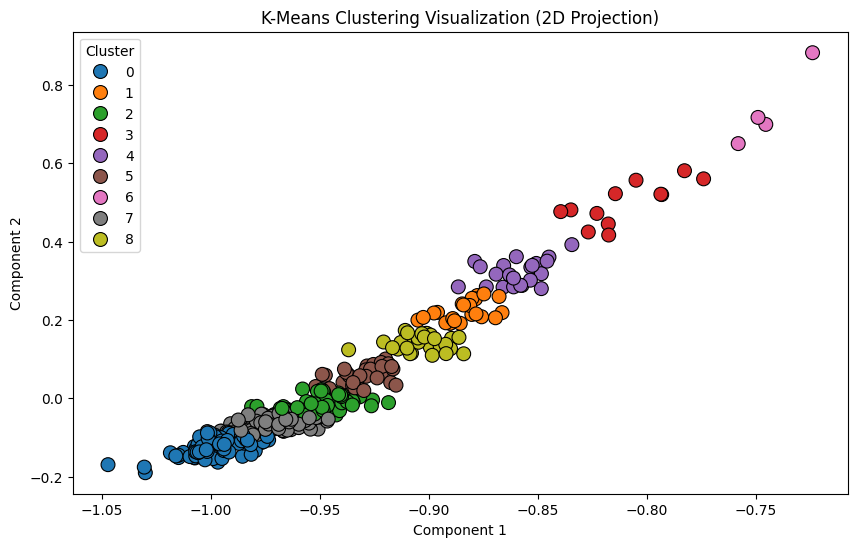

2025-03-09 15:10:26,806 : INFO : collecting all words and their counts
2025-03-09 15:10:26,808 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:26,809 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:26,813 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:26,815 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:26,818 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:26.818669', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:26,819 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:26 

Finished executing at: 2025-03-09 15:10:26 

Executed at: 2025-03-09 15:10:26 



2025-03-09 15:10:27,011 : INFO : EPOCH 8: training on 24723 raw words (4695 effective words) took 0.0s, 376223 effective words/s
2025-03-09 15:10:27,031 : INFO : EPOCH 9: training on 24723 raw words (4726 effective words) took 0.0s, 356048 effective words/s
2025-03-09 15:10:27,050 : INFO : EPOCH 10: training on 24723 raw words (4653 effective words) took 0.0s, 433672 effective words/s
2025-03-09 15:10:27,074 : INFO : EPOCH 11: training on 24723 raw words (4673 effective words) took 0.0s, 300659 effective words/s
2025-03-09 15:10:27,099 : INFO : EPOCH 12: training on 24723 raw words (4734 effective words) took 0.0s, 388501 effective words/s
2025-03-09 15:10:27,124 : INFO : EPOCH 13: training on 24723 raw words (4699 effective words) took 0.0s, 314344 effective words/s
2025-03-09 15:10:27,155 : INFO : EPOCH 14: training on 24723 raw words (4774 effective words) took 0.0s, 263604 effective words/s
2025-03-09 15:10:27,185 : INFO : EPOCH 15: training on 24723 raw words (4706 effective words

sg=0, Vector_Size=200, Window=12, Epoch=50
Finished displaying at: 2025-03-09 15:10:28 

Executing 9 start time: 2025-03-09 15:10:28
K=9: Silhouette Score and WSS=0.1663	4.4916

Cluster 0:
- Russian drone attack damages Chernobyl shelter, Zelensky says
- ‘Will Send it Straight to PM’, Army Chief on Imran Khan’s letters
- LHC takes stand against illegal dog culling
- Did Elon Musk’s son really tell Trump to 'shush your f***ing mouth up' in the Oval Office?
- Agri talks with China likely next month: Tanveer

Cluster 1:
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- Page Analyses and Comments LHR Page 2
- Railways to restore Shah Hussain Express from 25th
- 26 Year-Old TikToker Bailey Hutchins Tragically Passes Away After 2 Year Battle With Colon Cancer
- Security forces kill 13 terrorists in KP operations

Cluster 2:
- PM condemns Harnai blast, vows action against culprits
- Shab-e-Barat being observed with religious fervour across country
- Still Angry at Y

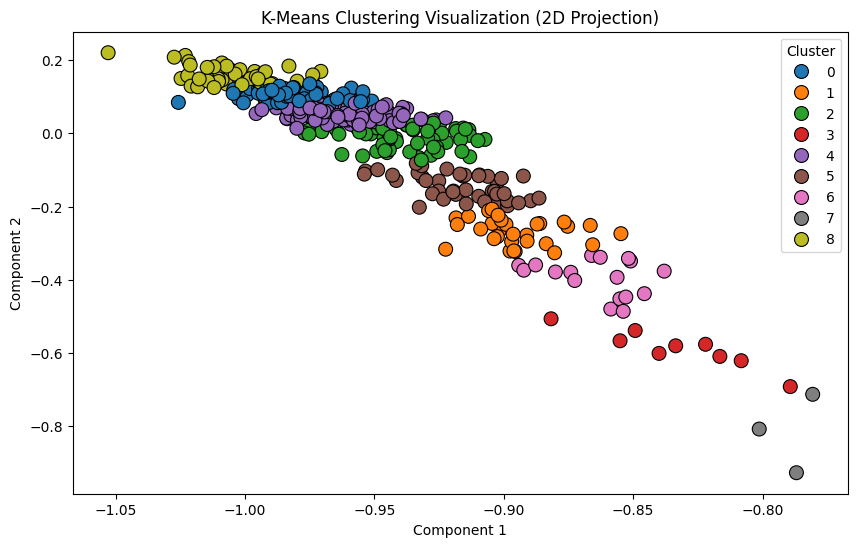

2025-03-09 15:10:28,510 : INFO : collecting all words and their counts
2025-03-09 15:10:28,511 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:28,511 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:28,514 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:28,516 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:28,518 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:28.518514', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:28,519 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:28 

Finished executing at: 2025-03-09 15:10:28 

Executed at: 2025-03-09 15:10:28 



2025-03-09 15:10:28,687 : INFO : EPOCH 1: training on 24723 raw words (4742 effective words) took 0.0s, 42415024 effective words/s
2025-03-09 15:10:28,720 : INFO : EPOCH 2: training on 24723 raw words (4686 effective words) took 0.0s, 286025 effective words/s
2025-03-09 15:10:28,741 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.0s, 439104 effective words/s
2025-03-09 15:10:28,761 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.0s, 425063 effective words/s
2025-03-09 15:10:28,780 : INFO : EPOCH 5: training on 24723 raw words (4683 effective words) took 0.0s, 432598 effective words/s
2025-03-09 15:10:28,799 : INFO : EPOCH 6: training on 24723 raw words (4578 effective words) took 0.0s, 659217 effective words/s
2025-03-09 15:10:28,816 : INFO : EPOCH 7: training on 24723 raw words (4580 effective words) took 0.0s, 493609 effective words/s
2025-03-09 15:10:28,834 : INFO : EPOCH 8: training on 24723 raw words (4780 effective words) to

sg=0, Vector_Size=200, Window=15, Epoch=50
Finished displaying at: 2025-03-09 15:10:29 

Executing 9 start time: 2025-03-09 15:10:29
K=9: Silhouette Score and WSS=0.1950	3.0949

Cluster 0:
- Economic indicators showing positive trends, says Khurram Schehzad
- PARTLY FACETIOUS: Our stakeholders know everything about everything
- PA pre-budget debate overshadowed by lawmakers’ apathy
- Sharaa speaks of ‘strong strategic ties’ with Russia in Putin phone call
- New Zealand provide update on Rachin Ravindra's injury ahead of tri-series final

Cluster 1:
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- FPSC issues latest public notice regarding CSS Exams 2025
- SBP reserves fall $500m in less than a month | Dawn News English
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- India seen seeking global bids this year for 114 fighters

Cluster 2:
- Leonardo DiCaprio’s ex Bar Refaeli's Valentine’s Day lingerie shoot goes viral
- Taco Bel

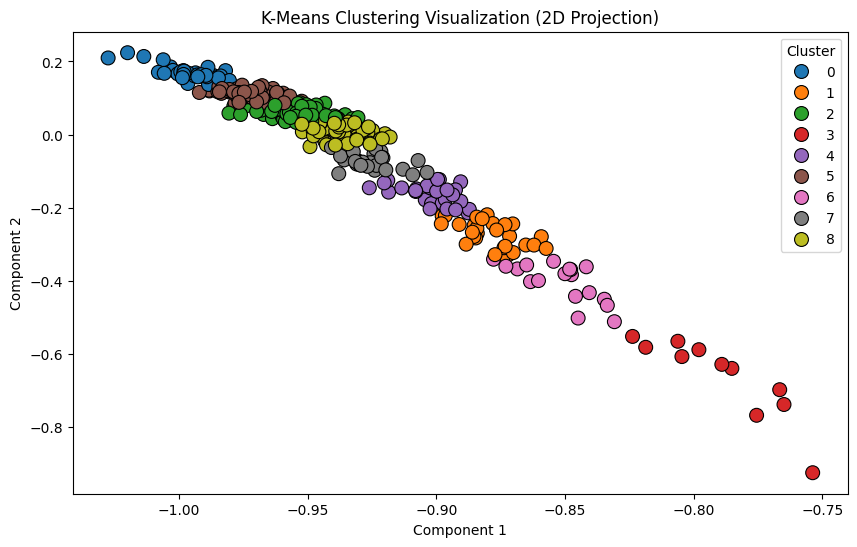

2025-03-09 15:10:30,036 : INFO : collecting all words and their counts
2025-03-09 15:10:30,037 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:30,038 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:30,045 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:30,046 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:30,047 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:30.047054', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:30,049 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:30 

Finished executing at: 2025-03-09 15:10:30 

Executed at: 2025-03-09 15:10:30 



2025-03-09 15:10:30,236 : INFO : EPOCH 9: training on 24723 raw words (4548 effective words) took 0.0s, 499659 effective words/s
2025-03-09 15:10:30,254 : INFO : EPOCH 10: training on 24723 raw words (4721 effective words) took 0.0s, 465963 effective words/s
2025-03-09 15:10:30,275 : INFO : EPOCH 11: training on 24723 raw words (4673 effective words) took 0.0s, 328294 effective words/s
2025-03-09 15:10:30,301 : INFO : EPOCH 12: training on 24723 raw words (4647 effective words) took 0.0s, 523140 effective words/s
2025-03-09 15:10:30,320 : INFO : EPOCH 13: training on 24723 raw words (4610 effective words) took 0.0s, 414792 effective words/s
2025-03-09 15:10:30,339 : INFO : EPOCH 14: training on 24723 raw words (4561 effective words) took 0.0s, 411116 effective words/s
2025-03-09 15:10:30,358 : INFO : EPOCH 15: training on 24723 raw words (4680 effective words) took 0.0s, 430939 effective words/s
2025-03-09 15:10:30,375 : INFO : EPOCH 16: training on 24723 raw words (4655 effective word

sg=0, Vector_Size=200, Window=20, Epoch=50
Finished displaying at: 2025-03-09 15:10:31 

Executing 9 start time: 2025-03-09 15:10:31
K=9: Silhouette Score and WSS=0.1727	3.8633

Cluster 0:
- Law ministry notifies appointments of six SC judges, four high court chief justices
- Gold set for seventh weekly gain as trade war risks lift demand
- Mohsin Naqvi announces three-day spring festival in Islamabad
- PARTLY FACETIOUS: Our stakeholders know everything about everything
- Reforming pension funds in Pakistan: a sustainable approach

Cluster 1:
- Champions Trophy 2025: squads, groups and schedule
- Honda City updated five-year installment plan in Pakistan for Feb 2025
- Pakistan Foreign Policy Challenges: Post US Presidential Election 2024
- PSX witnesses bearish trend, loses 360 points
- ICC announces prize money for 2025 Champions Trophy

Cluster 2:
- Thousands of patients treated at PIMS OPD in evening hours
- Hamas expected to name Israeli hostages it will free this weekend
- Pakista

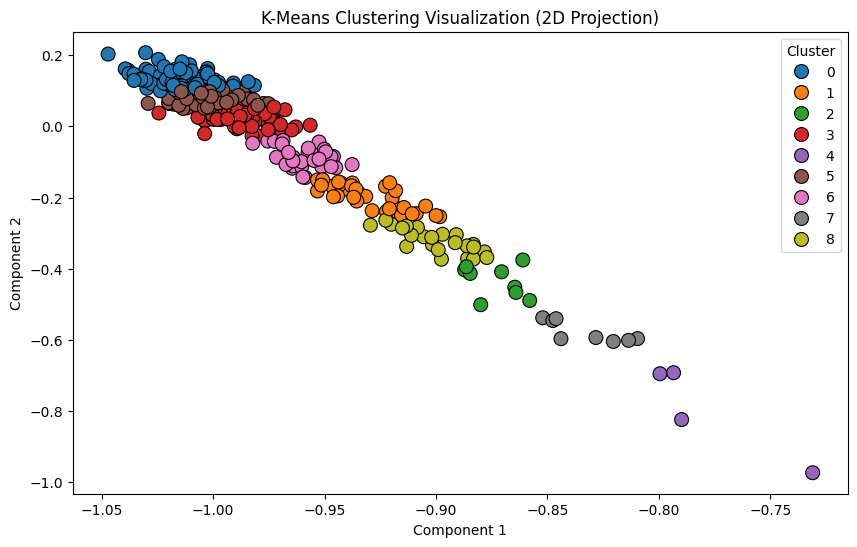

Finished displaying at: 2025-03-09 15:10:31 

Finished executing at: 2025-03-09 15:10:31 



In [149]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

2025-03-09 15:10:31,645 : INFO : collecting all words and their counts
2025-03-09 15:10:31,647 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:31,648 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:31,652 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:31,654 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:31,656 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:31.656430', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:31,657 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:10:31 



2025-03-09 15:10:31,827 : INFO : EPOCH 8: training on 24723 raw words (4648 effective words) took 0.0s, 457670 effective words/s
2025-03-09 15:10:31,845 : INFO : EPOCH 9: training on 24723 raw words (4567 effective words) took 0.0s, 505054 effective words/s
2025-03-09 15:10:31,861 : INFO : EPOCH 10: training on 24723 raw words (4692 effective words) took 0.0s, 547153 effective words/s
2025-03-09 15:10:31,879 : INFO : EPOCH 11: training on 24723 raw words (4732 effective words) took 0.0s, 624546 effective words/s
2025-03-09 15:10:31,895 : INFO : EPOCH 12: training on 24723 raw words (4733 effective words) took 0.0s, 509582 effective words/s
2025-03-09 15:10:31,910 : INFO : EPOCH 13: training on 24723 raw words (4698 effective words) took 0.0s, 598075 effective words/s
2025-03-09 15:10:31,926 : INFO : EPOCH 14: training on 24723 raw words (4688 effective words) took 0.0s, 578159 effective words/s
2025-03-09 15:10:31,941 : INFO : EPOCH 15: training on 24723 raw words (4685 effective words

sg=0, Vector_Size=200, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:10:32 

Executing 13 start time: 2025-03-09 15:10:32
K=13: Silhouette Score and WSS=0.1344	3.1693

Cluster 0:
- Sri Lanka shares end higher; central bank sees inflation peak above target in Q2 next year
- Paramount channels, including CBS and Nickelodeon, to go dark on YouTube TV
- The Digital Cold War: AI, Blockchain, Fintech, and the US-China Battle for Financial Dominance Pt 2
- Markelle Fultz back in the NBA: Sacremento Kings sign former No. 1 pick
- Senate pays rich tributes to Prince Karim Aga Khan

Cluster 1:
- Israeli military killed 85 journalists in 2024: CPJ
- Gold adds to record rally, reaches Rs306,200 per tola in Pakistan
- IMF’s 2024 Article IV report, and debate on inflation—I
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR

Cluster 2:
- Page Analyses and Comments LHR Page 2
- Canada vs Swed

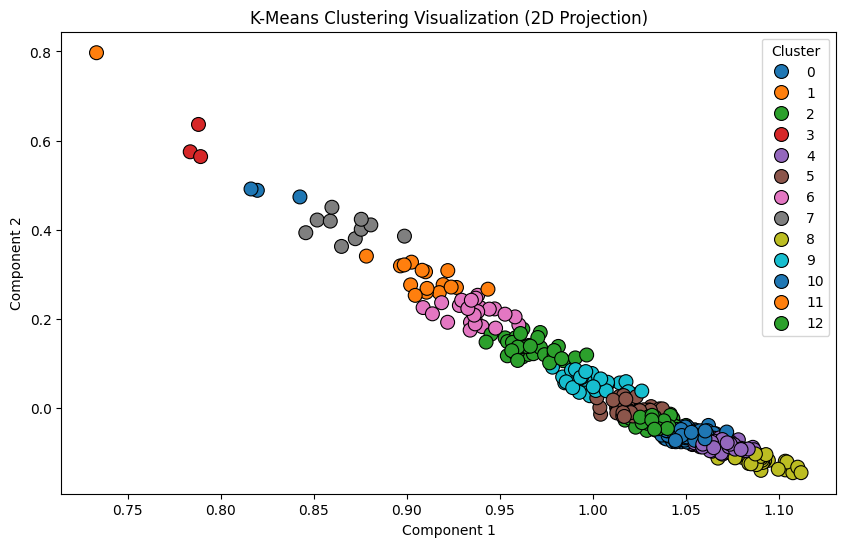

2025-03-09 15:10:33,194 : INFO : collecting all words and their counts
2025-03-09 15:10:33,195 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:33,196 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:33,200 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:33,203 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:33,204 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:33.204213', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:33,205 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:33 

Finished executing at: 2025-03-09 15:10:33 

Executed at: 2025-03-09 15:10:33 



2025-03-09 15:10:33,391 : INFO : EPOCH 8: training on 24723 raw words (4629 effective words) took 0.0s, 553218 effective words/s
2025-03-09 15:10:33,407 : INFO : EPOCH 9: training on 24723 raw words (4651 effective words) took 0.0s, 1137581 effective words/s
2025-03-09 15:10:33,423 : INFO : EPOCH 10: training on 24723 raw words (4675 effective words) took 0.0s, 496918 effective words/s
2025-03-09 15:10:33,438 : INFO : EPOCH 11: training on 24723 raw words (4704 effective words) took 0.0s, 616433 effective words/s
2025-03-09 15:10:33,452 : INFO : EPOCH 12: training on 24723 raw words (4682 effective words) took 0.0s, 597224 effective words/s
2025-03-09 15:10:33,469 : INFO : EPOCH 13: training on 24723 raw words (4586 effective words) took 0.0s, 436093 effective words/s
2025-03-09 15:10:33,486 : INFO : EPOCH 14: training on 24723 raw words (4689 effective words) took 0.0s, 491710 effective words/s
2025-03-09 15:10:33,510 : INFO : EPOCH 15: training on 24723 raw words (4571 effective word

sg=0, Vector_Size=200, Window=5, Epoch=50
Finished displaying at: 2025-03-09 15:10:34 

Executing 13 start time: 2025-03-09 15:10:34
K=13: Silhouette Score and WSS=0.1490	3.4219

Cluster 0:
- Emirati ambassador to Washington says ‘no alternative’ to Trump's Gaza plan
- Kubra Khan and Gohar Rasheed are officially married!
- US deports migrants from Pakistan to Panama
- Shaza engaging Huawei to advance Pak cloud infrastructure
- Bureaucrats will also have to declare their assets

Cluster 1:
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Pakistan’s external debt servicing jumps to $4.2 billion in Q2-FY25
- SBP reserves fall $500m in less than a month | Dawn News English
- The Lord of the Rings: The Rings of Power season 3 officially renewed with filming starting in 2025
- SBP injects over Rs 1.9 trillion in market

Cluster 2:
- FO dismisses India-US statement against Pakistan as ‘one-sided, misleading’
- China’s yuan strengthens as central bank pledges to keep exchange rat

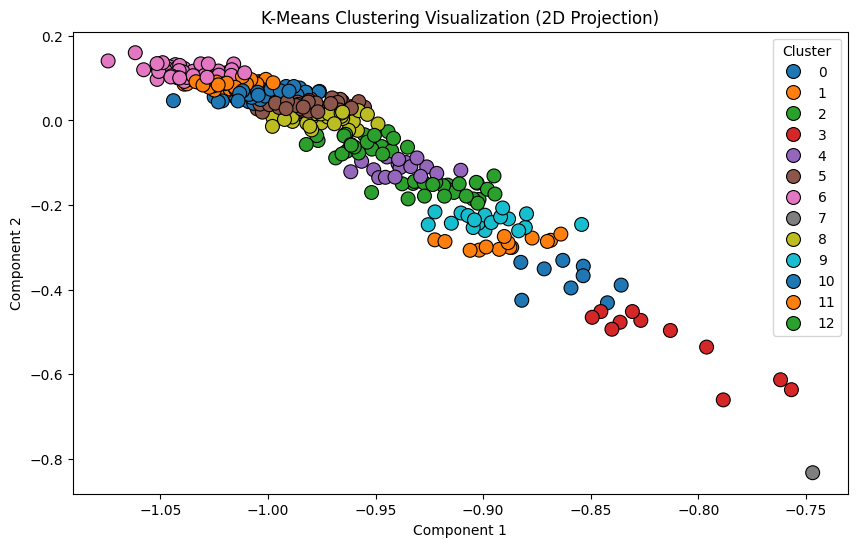

2025-03-09 15:10:34,611 : INFO : collecting all words and their counts
2025-03-09 15:10:34,612 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:34,613 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:34,620 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:34,622 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:34,624 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:34.624407', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:34,624 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:34 

Finished executing at: 2025-03-09 15:10:34 

Executed at: 2025-03-09 15:10:34 



2025-03-09 15:10:34,946 : INFO : EPOCH 8: training on 24723 raw words (4682 effective words) took 0.0s, 260019 effective words/s
2025-03-09 15:10:35,008 : INFO : EPOCH 9: training on 24723 raw words (4698 effective words) took 0.0s, 97484 effective words/s
2025-03-09 15:10:35,036 : INFO : EPOCH 10: training on 24723 raw words (4569 effective words) took 0.0s, 278912 effective words/s
2025-03-09 15:10:35,060 : INFO : EPOCH 11: training on 24723 raw words (4590 effective words) took 0.0s, 347059 effective words/s
2025-03-09 15:10:35,084 : INFO : EPOCH 12: training on 24723 raw words (4695 effective words) took 0.0s, 318342 effective words/s
2025-03-09 15:10:35,108 : INFO : EPOCH 13: training on 24723 raw words (4668 effective words) took 0.0s, 354009 effective words/s
2025-03-09 15:10:35,136 : INFO : EPOCH 14: training on 24723 raw words (4687 effective words) took 0.0s, 300133 effective words/s
2025-03-09 15:10:35,163 : INFO : EPOCH 15: training on 24723 raw words (4759 effective words)

sg=0, Vector_Size=200, Window=7, Epoch=50
Finished displaying at: 2025-03-09 15:10:36 

Executing 13 start time: 2025-03-09 15:10:36
K=13: Silhouette Score and WSS=0.1431	2.9974

Cluster 0:
- Aurangzeb highlights increasing risks facing insurance industry
- Emirati ambassador to Washington says ‘no alternative’ to Trump's Gaza plan
- Sharaa speaks of ‘strong strategic ties’ with Russia in Putin phone call
- Pakistan condemns Netanyahu’s remarks on Palestinian state in Saudi Arabia
- Macron warns against ‘peace that is a capitulation’ in Ukraine

Cluster 1:
- India expects $200 million missile deal with Philippines this year, sources say
- Elahi’s plea: AC reserves verdict till 27th
- Wasim Akram joins Meer Group to drive Global Impact Vision 2030
- Pakistan Foreign Policy Challenges: Post US Presidential Election 2024
- Over 500 million devotees take 'holy dip' at Maha Kumbh Mela in India

Cluster 2:
- Sri Lanka hammer Australia in record 174-run rout
- 394th annual Urs of Hazrat Ishan

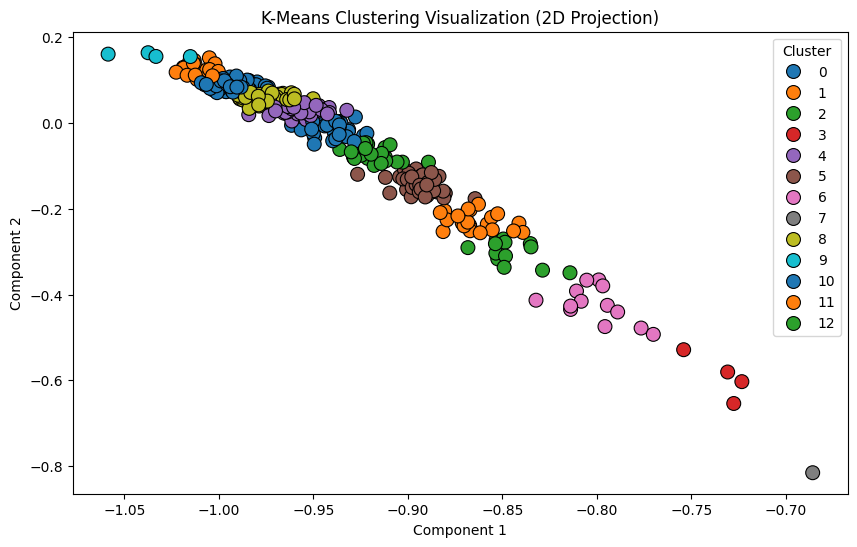

2025-03-09 15:10:37,543 : INFO : collecting all words and their counts
2025-03-09 15:10:37,550 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:37,555 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:37,566 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:37,582 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:37,587 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:37.587997', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:37,591 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:37 

Finished executing at: 2025-03-09 15:10:37 

Executed at: 2025-03-09 15:10:37 



2025-03-09 15:10:37,758 : INFO : EPOCH 1: training on 24723 raw words (4736 effective words) took 0.0s, 177920 effective words/s
2025-03-09 15:10:37,809 : INFO : EPOCH 2: training on 24723 raw words (4750 effective words) took 0.0s, 157457 effective words/s
2025-03-09 15:10:37,853 : INFO : EPOCH 3: training on 24723 raw words (4613 effective words) took 0.0s, 216304 effective words/s
2025-03-09 15:10:37,907 : INFO : EPOCH 4: training on 24723 raw words (4698 effective words) took 0.0s, 152030 effective words/s
2025-03-09 15:10:37,998 : INFO : EPOCH 5: training on 24723 raw words (4552 effective words) took 0.0s, 307657 effective words/s
2025-03-09 15:10:38,063 : INFO : EPOCH 6: training on 24723 raw words (4674 effective words) took 0.0s, 163986 effective words/s
2025-03-09 15:10:38,120 : INFO : EPOCH 7: training on 24723 raw words (4616 effective words) took 0.0s, 220104 effective words/s
2025-03-09 15:10:38,167 : INFO : EPOCH 8: training on 24723 raw words (4722 effective words) took

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:10:39 

Executing 13 start time: 2025-03-09 15:10:39
K=13: Silhouette Score and WSS=0.1612	3.1378

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Lady Gaga shocked by Sean Evans’ deep-cut questions in Hot Ones teaser
- Wang's London visit marks revival of UK ties
- CM Murad invites Japanese companies to invest in Karachi mass transit projects
- In a first, new SC judges to take oath outdoors

Cluster 1:
- Excellence Over Perfection: Highlights from the ADA Awards 2025
- KSE-100 closes 479 points lower as late-session selling erases intra-day gains
- IMF’s 2024 Article IV report, and debate on inflation—I
- PSX witnesses bearish trend, loses 360 points
- Pakistan CPI 2024 – deep-rooted corruption persists

Cluster 2:
- The Digital Cold War: AI, Blockchain, Fintech, and the US-China Battle for Financial Dominance Pt 2
- Elon Musk announces Grok 3 AI chatbot launch in the next tw

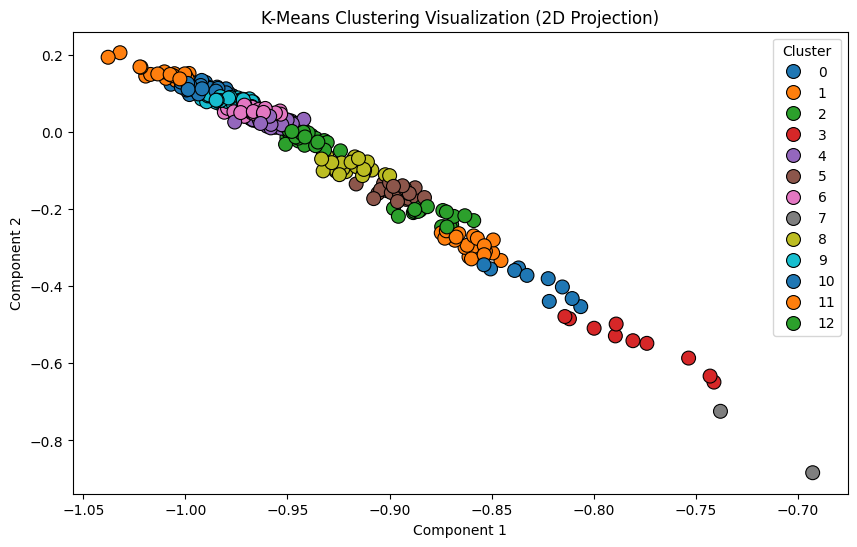

2025-03-09 15:10:40,942 : INFO : collecting all words and their counts
2025-03-09 15:10:40,944 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:40,946 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:40,954 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:40,959 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:40,962 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:40.962518', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:40,966 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:40 

Finished executing at: 2025-03-09 15:10:40 

Executed at: 2025-03-09 15:10:40 



2025-03-09 15:10:41,167 : INFO : EPOCH 2: training on 24723 raw words (4633 effective words) took 0.0s, 287434 effective words/s
2025-03-09 15:10:41,215 : INFO : EPOCH 3: training on 24723 raw words (4686 effective words) took 0.0s, 178672 effective words/s
2025-03-09 15:10:41,259 : INFO : EPOCH 4: training on 24723 raw words (4644 effective words) took 0.0s, 158794 effective words/s
2025-03-09 15:10:41,314 : INFO : EPOCH 5: training on 24723 raw words (4609 effective words) took 0.0s, 179380 effective words/s
2025-03-09 15:10:41,366 : INFO : EPOCH 6: training on 24723 raw words (4724 effective words) took 0.0s, 162829 effective words/s
2025-03-09 15:10:41,411 : INFO : EPOCH 7: training on 24723 raw words (4487 effective words) took 0.0s, 240452 effective words/s
2025-03-09 15:10:41,470 : INFO : EPOCH 8: training on 24723 raw words (4603 effective words) took 0.0s, 129930 effective words/s
2025-03-09 15:10:41,526 : INFO : EPOCH 9: training on 24723 raw words (4698 effective words) took

sg=0, Vector_Size=200, Window=12, Epoch=50
Finished displaying at: 2025-03-09 15:10:43 

Executing 13 start time: 2025-03-09 15:10:43
K=13: Silhouette Score and WSS=0.1739	2.9338

Cluster 0:
- Aurangzeb highlights increasing risks facing insurance industry
- Illegal structures razed in Lahore’s Subzazar Housing Scheme
- Field of education: Pakistan, Kazakhstan for enhancing mutual cooperation
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- Naqvi inaugurates passport office at NADRA Mega Centre in Karachi’s Nazimabad

Cluster 1:
- JazzCash, Mobilink Bank named finalists for prestigious GLOMO Awards 2025
- Druski roasted by NBA fans for bold 2025 All-Star game stat predictions and lack of defense
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- Saudi Arabia confirms alcohol ban at 2034 FIFA World Cup
- No alcohol for fans at World Cup 2034, says Saudi Arabia ambassador

Cluster 2:
- Explosion near security convoy in Bannu injures two 

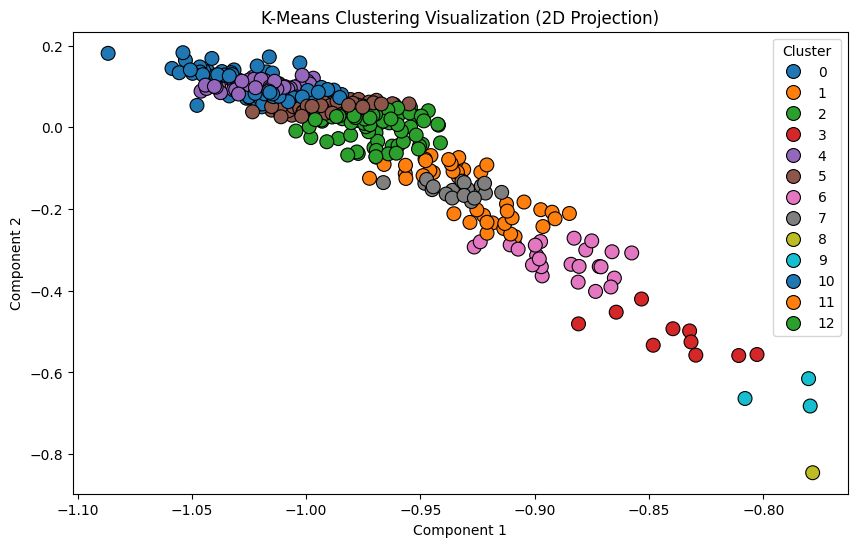

2025-03-09 15:10:44,025 : INFO : collecting all words and their counts
2025-03-09 15:10:44,027 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:44,029 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:44,035 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:44,039 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:44,042 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:44.042050', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:44,046 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:44 

Finished executing at: 2025-03-09 15:10:44 

Executed at: 2025-03-09 15:10:44 



2025-03-09 15:10:44,230 : INFO : EPOCH 3: training on 24723 raw words (4717 effective words) took 0.0s, 386639 effective words/s
2025-03-09 15:10:44,268 : INFO : EPOCH 4: training on 24723 raw words (4659 effective words) took 0.0s, 199145 effective words/s
2025-03-09 15:10:44,310 : INFO : EPOCH 5: training on 24723 raw words (4614 effective words) took 0.0s, 192077 effective words/s
2025-03-09 15:10:44,354 : INFO : EPOCH 6: training on 24723 raw words (4678 effective words) took 0.0s, 159850 effective words/s
2025-03-09 15:10:44,394 : INFO : EPOCH 7: training on 24723 raw words (4477 effective words) took 0.0s, 182452 effective words/s
2025-03-09 15:10:44,439 : INFO : EPOCH 8: training on 24723 raw words (4697 effective words) took 0.0s, 192720 effective words/s
2025-03-09 15:10:44,466 : INFO : EPOCH 9: training on 24723 raw words (4564 effective words) took 0.0s, 293709 effective words/s
2025-03-09 15:10:44,491 : INFO : EPOCH 10: training on 24723 raw words (4672 effective words) too

sg=0, Vector_Size=200, Window=15, Epoch=50
Finished displaying at: 2025-03-09 15:10:45 

Executing 13 start time: 2025-03-09 15:10:45
K=13: Silhouette Score and WSS=0.1731	3.2350

Cluster 0:
- Naqvi inaugurates passport office at NADRA Mega Centre in Karachi’s Nazimabad
- Karachi basketball at crossroads as rival factions clash
- Pakistan condemns Netanyahu’s remarks on Palestinian state in Saudi Arabia
- Watch: Humpback whale swallows kayaker in dramatic Chilean waters encounter
- Atif Aslam’s breakup advice gains attention and debate

Cluster 1:
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- SBP reserves fall $500m in less than a month | Dawn News English
- CSS 2025 exam to begin as scheduled after IHC dismisses postponement plea
- India expects $200 million missile deal with Philippines this year, sources say

Cluster 2:
- PAF’s JF-17 to perform at Champions Trophy opening c

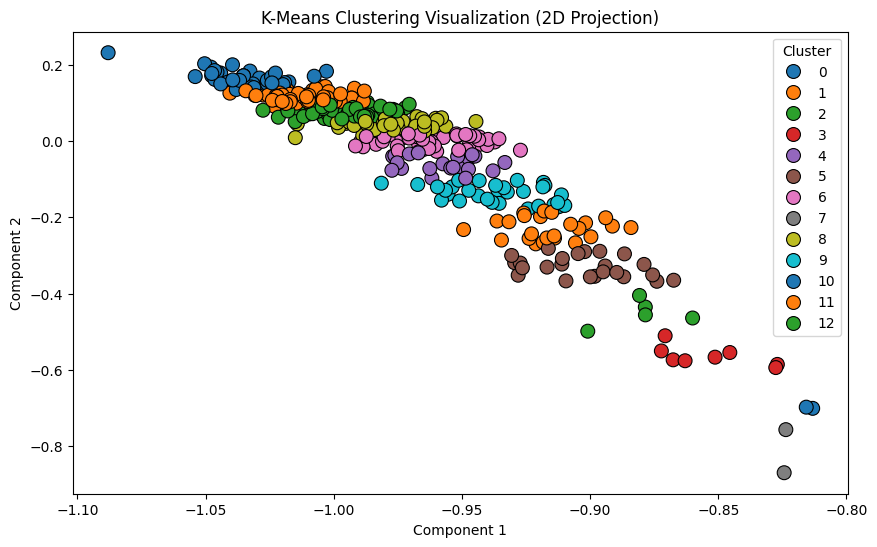

2025-03-09 15:10:46,287 : INFO : collecting all words and their counts
2025-03-09 15:10:46,289 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:10:46,289 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:10:46,294 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:10:46,296 : INFO : Creating a fresh vocabulary
2025-03-09 15:10:46,299 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:10:46.298433', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:10:46,300 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:10:46 

Finished executing at: 2025-03-09 15:10:46 

Executed at: 2025-03-09 15:10:46 



2025-03-09 15:10:46,493 : INFO : EPOCH 7: training on 24723 raw words (4680 effective words) took 0.0s, 323535 effective words/s
2025-03-09 15:10:46,517 : INFO : EPOCH 8: training on 24723 raw words (4666 effective words) took 0.0s, 350529 effective words/s
2025-03-09 15:10:46,538 : INFO : EPOCH 9: training on 24723 raw words (4664 effective words) took 0.0s, 438358 effective words/s
2025-03-09 15:10:46,557 : INFO : EPOCH 10: training on 24723 raw words (4659 effective words) took 0.0s, 347996 effective words/s
2025-03-09 15:10:46,579 : INFO : EPOCH 11: training on 24723 raw words (4727 effective words) took 0.0s, 361931 effective words/s
2025-03-09 15:10:46,598 : INFO : EPOCH 12: training on 24723 raw words (4714 effective words) took 0.0s, 404541 effective words/s
2025-03-09 15:10:46,619 : INFO : EPOCH 13: training on 24723 raw words (4663 effective words) took 0.0s, 361042 effective words/s
2025-03-09 15:10:46,641 : INFO : EPOCH 14: training on 24723 raw words (4716 effective words)

sg=0, Vector_Size=200, Window=20, Epoch=50
Finished displaying at: 2025-03-09 15:10:47 

Executing 13 start time: 2025-03-09 15:10:47
K=13: Silhouette Score and WSS=0.1870	3.9357

Cluster 0:
- Naqvi inaugurates passport office at NADRA Mega Centre in Karachi’s Nazimabad
- Macron warns against ‘peace that is a capitulation’ in Ukraine
- Caught in crossfire? Women under siege in influencer culture
- Harsher penalties for forced begging in Punjab
- Bureaucrats will also have to declare their assets

Cluster 1:
- 26 Year-Old TikToker Bailey Hutchins Tragically Passes Away After 2 Year Battle With Colon Cancer
- Petrol Price in Pakistan to ‘go down’ from Feb 16 amid dip in global oil rates
- PFC makes significant impact at 11th IDF
- Sean Strickland responds to coach’s harsh criticism of UFC 312 loss
- MoITT sets up 43 software tech parks

Cluster 2:
- Cold and dry weather to prevail across Pakistan: PMD
- Alligators, raccoons, and more thrive in urban sewer systems
- Pope Francis, 88, admi

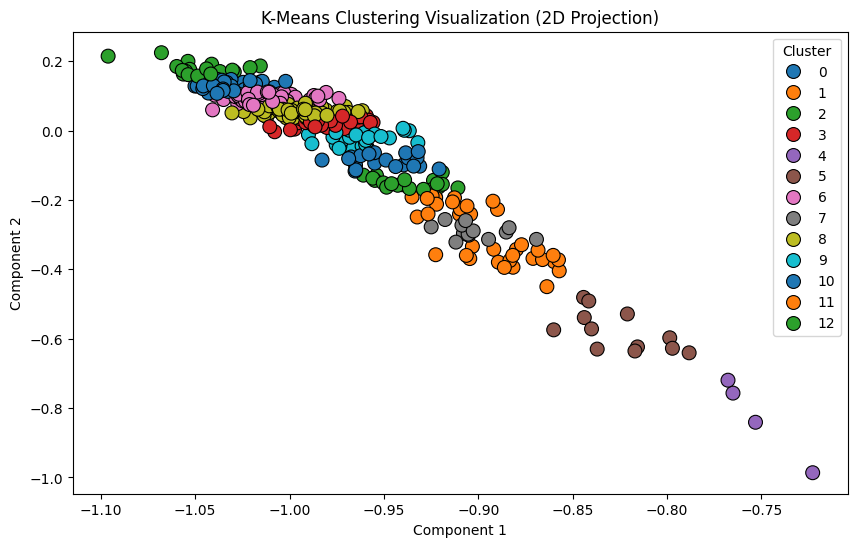

Finished displaying at: 2025-03-09 15:10:48 

Finished executing at: 2025-03-09 15:10:48 



In [150]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [151]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results.csv", index=False)

results_df

,k,Vectorizer Type,vector_size,window,Epochs Count,Vectorizer Name,Silhouette Score,WSS Score
0,5,Word2Vec,200,3,50,CBOW,0.203525,4.434225
1,5,Word2Vec,200,5,50,CBOW,0.196270,5.357225
2,5,Word2Vec,200,7,50,CBOW,0.192766,5.322340
3,5,Word2Vec,200,10,50,CBOW,0.260897,4.396202
4,5,Word2Vec,200,12,50,CBOW,0.212185,5.448956
5,5,Word2Vec,200,15,50,CBOW,0.219598,4.967247
6,5,Word2Vec,200,20,50,CBOW,0.254859,5.281855
7,9,Word2Vec,200,3,50,CBOW,0.150449,3.940170
8,9,Word2Vec,200,5,50,CBOW,0.175995,3.246517
9,9,Word2Vec,200,7,50,CBOW,0.179572,3.705316


In [152]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

,k,Average WSS Score
0,5,5.029721
1,9,3.685832
2,13,3.261557


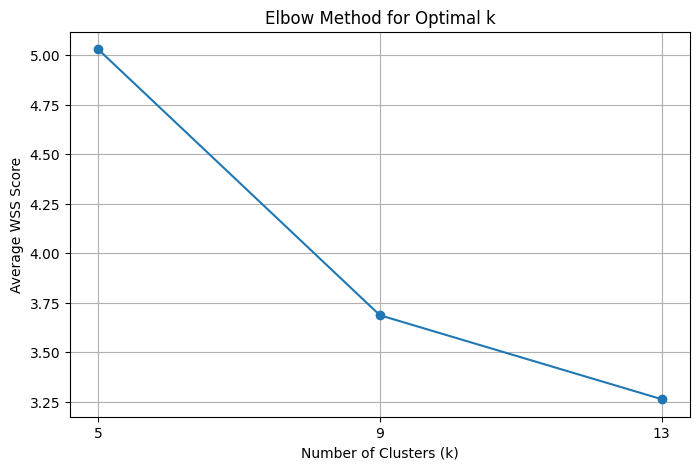

In [153]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [154]:
best_combination # vector size, window size, epoch

[5, 200, 10, 50, 0.26089746, 4.3962016105651855]